Poles of Ts: [-6.79128785+0.j -2.20871215+0.j]
Poles of Gs: [-2.+1.j -2.-1.j]
Zeros of Ts: [-2.+0.j]
Zeros of Gs: [-2.+0.j]


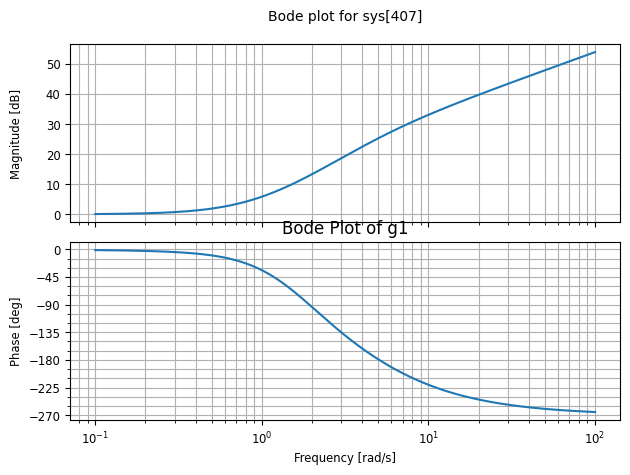

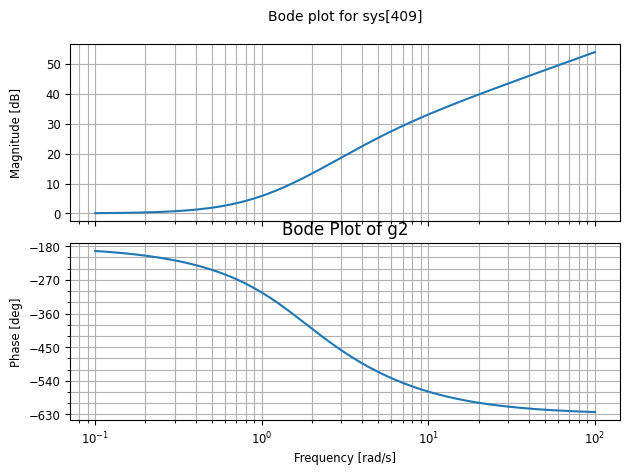

In [13]:
!pip install control
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Define transfer function variable
s = ctrl.TransferFunction.s

# Define transfer functions
Gs = (5 * s + 10) / (s**2 + 4 * s + 5)
Ts = (5 * s + 10) / (s**2 + 9 * s + 15)

# Create transfer functions for the terms (5 * (s + 1)) and (s * (5 * s + 1))
numerator_g1 = 5 * (s + 1)
denominator_g1 = s * (5 * s + 1)

numerator_g2 = 5 * (-s + 1)
denominator_g2 = s * (5 * s + 1)

# Create transfer function objects for the terms
numerator_g1_tf = ctrl.TransferFunction([5, 5], [1, 0])  # Transfer function for 5*(s + 1)
denominator_g1_tf = ctrl.TransferFunction([1, 5], [1, 1, 0])  # Transfer function for s*(5*s + 1)

numerator_g2_tf = ctrl.TransferFunction([5, -5], [1, 0])  # Transfer function for 5*(-s + 1)
denominator_g2_tf = ctrl.TransferFunction([1, 5], [1, 1, 0])  # Transfer function for s*(5*s + 1)

# Using Padé approximation to handle time delay
# np.exp(-2 * s) can be approximated with a Padé approximation
g1_delay_num, g1_delay_den = ctrl.pade(2, 2)  # 2nd order Padé approximation for delay
g2_delay_num, g2_delay_den = ctrl.pade(2, 2)  # 2nd order Padé approximation for delay

# Convert the Padé approximation to transfer function
g1_delay_tf = ctrl.TransferFunction(g1_delay_num, g1_delay_den)
g2_delay_tf = ctrl.TransferFunction(g2_delay_num, g2_delay_den)

# Multiply the terms with the Padé approximations for the delay
g1 = numerator_g1_tf * g1_delay_tf / denominator_g1_tf
g2 = numerator_g2_tf * g2_delay_tf / denominator_g2_tf


# Compute poles and zeros
poles_Ts = ctrl.poles(Ts)
poles_Gs = ctrl.poles(Gs)
zeros_Ts = ctrl.zeros(Ts)
zeros_Gs = ctrl.zeros(Gs)

# Print results
print("Poles of Ts:", poles_Ts)
print("Poles of Gs:", poles_Gs)
print("Zeros of Ts:", zeros_Ts)
print("Zeros of Gs:", zeros_Gs)

# Bode plots
plt.figure()
ctrl.bode(g1, dB=True)
plt.title("Bode Plot of g1")
plt.show()

plt.figure()
ctrl.bode(g2, dB=True)
plt.title("Bode Plot of g2")
plt.show()
